In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
(train_images, train_labels),(test_images, test_labels) = data

In [ ]:
len(train_images)

60000

In [ ]:
len(train_labels)

60000

In [ ]:
len(test_labels)

10000

In [ ]:
len(test_images)

10000

In [ ]:
train_images=train_images.reshape((60000, 28, 28, 1))

In [ ]:
test_images=test_images.reshape((10000,28,28,1))

In [ ]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
train_images = train_images.astype('float')/255

In [ ]:
test_images= test_images.astype('float')/255

In [ ]:
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt

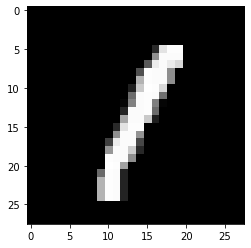

In [ ]:
plt.imshow(image.array_to_img(train_images[77]), cmap='gray')

In [ ]:
train_labels[77]

1

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_originals= train_labels

In [ ]:
train_labels=to_categorical(train_labels)

In [ ]:
train_labels_originals[1]

0

In [ ]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_originals=test_labels

In [ ]:
test_labels=to_categorical(test_labels)

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64,(3,3), activation ='relu'))

In [ ]:
model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())

In [ ]:
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                495680    
Total params: 514,496
Trainable params: 514,496
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=10,batch_size= 64)

Epoch 1/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.1385 - accuracy: 0.9574
Epoch 2/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0412 - accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0282 - accuracy: 0.9911
Epoch 4/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0209 - accuracy: 0.9938
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0154 - accuracy: 0.9955
Epoch 6/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0115 - accuracy: 0.9965
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0094 - accuracy: 0.9972
Epoch 8/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0069 - accuracy: 0.9981
Epoch 9/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0054 - accuracy: 0.9986
Epoch 10/10
60000/60000 [====================

In [ ]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 129us/step


In [ ]:
test_accuracy

0.9912999868392944

In [ ]:
test_loss

0.05338981016897423

In [ ]:
predictions=model.predict(test_images)

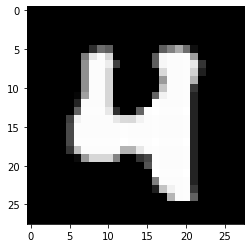

In [ ]:
plt.imshow(image.array_to_img(test_images[736]), cmap='gray')